In [1]:
import numpy as np
import pandas as pd

classicML = False #Used in saving process 

print("\n\nStarting model training..")
print("--------------------------------------\n")
train_df = pd.read_csv("data.csv")
X = train_df.iloc[:,1:]
y = train_df.iloc[:,0]



Starting model training..
--------------------------------------



In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

if classicML:
    # XGBoost Code
    import xgboost as xgb
    from xgboost import XGBClassifier
    #Default settings - Now deprecated with optimized settings. 
    #pipeline = Pipeline(steps=[('minmaxscaler', MinMaxScaler(feature_range=(0, 1), copy=True)),
    #                            ('XgbClassifier', XGBClassifier(objective = 'multi:softmax'))
    #                           ])
    #Based upon random search results.
    #Accuracy score was 91% on 20% of the training data.
    pipeline = Pipeline(steps=[('minmaxscaler', MinMaxScaler(feature_range=(0, 1), copy=True)),
                               ('XgbClassifier', XGBClassifier(objective = 'multi:softmax',
                                                               gamma = 0.9,
                                                               learning_rate = 0.375,
                                                               max_depth = 9,
                                                               n_estimators = 9))])

else:
    pipeline = Pipeline(steps=[('minmaxscaler', MinMaxScaler(feature_range=(0, 1), copy=True))  ])

    from keras.models import Model
    from keras.models import Sequential
    from keras.layers import Input, Dense
    from keras.losses import sparse_categorical_crossentropy
    from keras.optimizers import SGD
    def create_model():
        model = Sequential()
        #units = (Input+Output)/2
        model.add(Dense(units = (int(round(len(X.columns)+9)/2)), activation = 'relu', input_dim= len(X.columns))) 
        model.add(Dense(10, activation = 'softmax'))
        model.compile(loss=sparse_categorical_crossentropy,
                      optimizer='adam', metrics = ['accuracy'])
        #SGD(lr=0.01, momentum=0.9, nesterov=True)
        return model
    classifier = create_model()

By creating a pipeline we can run one line of code to pre-process our data and train our model.
Later on this pipeline will also enable us to only need 1 line of code to pre-process and make predictions on new data.
Hence the code will be a lot cleaner.

Pipeline.steps can be called to view the all the components and parameters that make up the pipeline.

In [ ]:
# Random search code

# X = train_df.iloc[:,1:]
# y = train_df.iloc[:,0]

# from scipy.stats import randint
# import scipy
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.base import BaseEstimator, TransformerMixin
# import xgboost as xgb
# from xgboost import XGBClassifier
# from sklearn.model_selection import RandomizedSearchCV

# scaler = MinMaxScaler(feature_range=(0,1), copy=True)
# X = scaler.fit_transform(X)

# params = {'max_depth': randint(1, 10) ,
#           'learning_rate': scipy.stats.expon(scale=0.5),
#           'n_estimators': randint(1, 10),
#           'gamma': scipy.stats.expon(scale=1)
#            }


# import datetime
# print("\n\nStarting parameter search..")
# print("--------------------------------------\n")
# tstart = datetime.datetime.now()
# optimizer = RandomizedSearchCV(XGBClassifier(objective = 'multi:softmax'), params, n_iter = 25)
# optimizer.fit(X, y)
# tstop = datetime.datetime.now()
# tdelta = tstop - tstart
# print("Finished training.")
# print("Training duration in (Days/Hours/Seconds/Milliseconds): {0}".format(tdelta)) 
# print(optimizer.score()) #0.91130952380952379
# print(optimizer.best_params_) #{'gamma': 0.90390078036156596,
#                               #'learning_rate': 0.37483528867120858,
#                               #'max_depth': 9,
#                               #'n_estimators': 9}

In [9]:
import datetime

tstart = datetime.datetime.now()
if classicML:
    pipeline.fit(X, y)
else:
    X = pipeline.fit_transform(X, y)
    history = classifier.fit(X, y, batch_size = 128, epochs = 50, verbose = 1, validation_split=0.1)

tstop = datetime.datetime.now()
tdelta = tstop - tstart
print("Finished training.")
print("Training duration in (/Hours/Minutes/Seconds/Milliseconds): {0}".format(tdelta))


Train on 7560 samples, validate on 840 samples
Epoch 1/50
7560/7560 [==============================] - 1s 82us/step - loss: 0.0023 - acc: 0.9995 - val_loss: 0.2159 - val_acc: 0.9571
Epoch 2/50
7560/7560 [==============================] - 1s 73us/step - loss: 0.0022 - acc: 0.9995 - val_loss: 0.2140 - val_acc: 0.9560
Epoch 3/50
7560/7560 [==============================] - 1s 82us/step - loss: 0.0022 - acc: 0.9995 - val_loss: 0.2144 - val_acc: 0.9571
Epoch 4/50
7560/7560 [==============================] - 1s 74us/step - loss: 0.0021 - acc: 0.9995 - val_loss: 0.2142 - val_acc: 0.9571
Epoch 5/50
7560/7560 [==============================] - 1s 83us/step - loss: 0.0021 - acc: 0.9995 - val_loss: 0.2152 - val_acc: 0.9560
Epoch 6/50
7560/7560 [==============================] - 1s 73us/step - loss: 0.0021 - acc: 0.9995 - val_loss: 0.2166 - val_acc: 0.9560
Epoch 7/50
7560/7560 [==============================] - 1s 78us/step - loss: 0.0020 - acc: 0.9995 - val_loss: 0.2144 - val_acc: 0.9560
Epoch 8/

Then we train our model

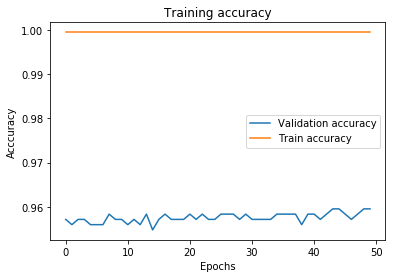

In [10]:
#If you want to visualize the xgboost decision tree..
#clf = pipeline.steps[1]
#graph = xgb.to_graphviz(clf[1])
#graph.render('pipelinetree')

#If you want to visualize the deep learning classifier
history.history.keys()
import matplotlib.pyplot as plt
import seaborn
history.history.keys()
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.title("Training accuracy")
plt.xlabel("Epochs")
plt.ylabel("Acccuracy")
plt.legend(['Validation accuracy', 'Train accuracy'])
#seaborn.lmplot(x = history.history['Epoch'], y = history.history['val_acc'])


We dont evaluate the model as this is up to the watcher, thus we save it now.

In [11]:
from sklearn.externals import joblib

if classicML:
    joblib.dump(pipeline, "pipeline.pkl")
    print("Pipeline has been saved as pipeline.pkl")
else:
    joblib.dump(pipeline, "pipeline.pkl")
    joblib.dump(history.history, "history.pkl")
    print("Pipeline has been saved as pipeline.pkl")
    classifier.save('model.h5')
    print("Model has been saved as model.h5")

Pipeline has been saved as pipeline.pkl
Model has been saved as model.h5
